#Package Setup

## Installations

In [6]:
!pip install umap-learn
!pip install sentence-transformers
!pip install pyvis
!pip install branca

## Imports

In [9]:
import csv
import umap
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from collections import defaultdict
import pyvis
from pyvis.network import Network
import numpy as np
import seaborn as sns
import branca.colormap as cm
import branca
import pandas as pd
import re
from textwrap import wrap
import json
import numpy as np
from scipy.stats import spearmanr
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

project_path = './'

# Visualization Creation Process

## Create Embeddings from Raw Data

In [2]:
# Create embeddings from interst data
def generate_embedding(file_name='MCDA5511-classmates - 2025.csv', model='all-MiniLM-L6-v2'):

    attendees_map = {}
    with open(project_path + file_name, newline='') as csvfile:
        attendees = csv.reader(csvfile, delimiter=',', quotechar='"')
        next(attendees)  # Skip the header row
        for row in attendees:
            name, paragraph = row
            attendees_map[paragraph] = name

    # Generate sentence embeddings
    model = SentenceTransformer('sentence-transformers/{}'.format(model))
    paragraphs = list(attendees_map.keys())
    embeddings = model.encode(paragraphs)

    # Create a dictionary to store embeddings for each person
    person_embeddings = {attendees_map[paragraph]: embedding for paragraph, embedding in zip(paragraphs, embeddings)}
    return person_embeddings

In [5]:
person_embeddings1 = generate_embedding(model='all-MiniLM-L6-v2')
person_embeddings2 = generate_embedding(model='all-MiniLM-L12-v2')

In [62]:
def compute_similarity_single_to_many(embedding, person_name='SicongFu'):

    query_embedding = embedding[person_name].reshape(1, -1)
    candidate_embeddings = np.array([v for k, v in embedding.items() if k != person_name])
    
    similarities = cosine_similarity(query_embedding, candidate_embeddings)
    return similarities

In [54]:
def compute_spearman_correlation(embeddings1, embeddings2):

    similarities1 = compute_similarity_single_to_many(embeddings1)
    similarities2 = compute_similarity_single_to_many(embeddings2)
    ranking1 = np.argsort(similarities1[0]) + 1
    ranking2 = np.argsort(similarities2[0]) + 1

    rho, _ = spearmanr(ranking1, ranking2)
    print(f"Spearman’s 𝜌: {rho}")
    return rho

In [63]:
rho = compute_spearman_correlation(person_embeddings1, person_embeddings2)

Spearman’s 𝜌: -0.03508771929824562


## Reducing dimensionality of embedding data, scaling to coordinate domain/range


In [56]:
# Reducing dimensionality of embedding data, scaling to coordinate domain/range
reducer = umap.UMAP(random_state=42) # set the seed to 42
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_embeddings1.values()))
reduced_data = reducer.fit_transform(scaled_data)


d:\anaconda\envs\ml\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


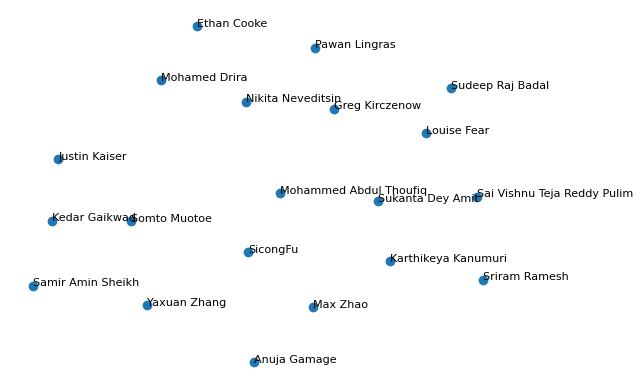

In [58]:
# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(person_embeddings1.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="8")

# Clean-up and Export
plt.axis('off')
plt.savefig(project_path+'visualization.png', dpi=800)

In [59]:
# Reducing dimensionality of embedding data, scaling to coordinate domain/range
reducer = umap.UMAP(random_state=42) # set the seed to 42
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_embeddings2.values()))
reduced_data = reducer.fit_transform(scaled_data)

d:\anaconda\envs\ml\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## Create Visualization Image

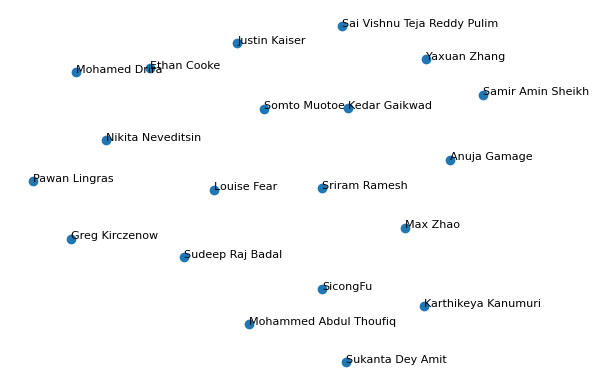

In [60]:
# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(person_embeddings2.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="8")

# Clean-up and Export
plt.axis('off')
plt.savefig(project_path+'visualization.png', dpi=800)

## Find the  top N matches to a node

## Add Colour/Paragraph Information to Dataframe

## Build Interative Network Visualization (Simple)

## Build Interative Network Visualization (Complex)
